In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [ ]:
df2 = pd.read_csv('/content/vital-statistics-suicide-deaths-by-age-group-race-ethnicity-resident-county-region-and-gender-beginn-1.csv')
df2.head()

,Year,Region,Race or Ethnicity,Sex,Age Group,Firearm Deaths,Alcohol-Related Deaths,Suicide Deaths
0,2017,NYC,White Non Hispanic,F,<1,0,0,0
1,2017,ROS,White Non Hispanic,M,Total,349,1751,770
2,2017,ROS,White Non Hispanic,F,Total,36,797,205
3,2017,ROS,White Non Hispanic,M,<1,0,0,0
4,2017,ROS,White Non Hispanic,F,<1,0,0,0


In [ ]:
df2.Region.unique()

array(['NYC', 'ROS'], dtype=object)

In [ ]:
df2["Race or Ethnicity"].unique()

array(['White Non Hispanic', 'Other Non Hispanic', 'Not Stated',
       'Hispanic', 'Black Non Hispanic'], dtype=object)

In [ ]:
df2["Age Group"].unique()

array(['<1', 'Total', '85+', '75-84', '65-74', '55-64', '45-54', '35-44',
       '25-34', '20-24', '10-19', '1-9'], dtype=object)

#Question: Which region has more Suicide Deaths NYC or ROS? 

In [ ]:
count_by_region = df2.groupby(["Region"])["Region"].count()

In [ ]:
count_by_region

Region
NYC     861
ROS    1215
Name: Region, dtype: int64

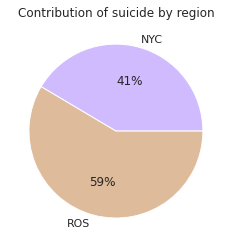

In [ ]:
colors = sns.color_palette('pastel')[4:6]
plt.pie(count_by_region, colors = colors, autopct='%.0f%%', labels = ["NYC", "ROS"])
plt.title("Contribution of suicide by region")
plt.show()

#Question: Which Race/Ethnicity contributes to maximum number of deaths by suicide? 

In [ ]:
count_by_race_or_ethnicity = df2.groupby(["Race or Ethnicity"])["Race or Ethnicity"].count()

In [ ]:
count_by_race_or_ethnicity

Race or Ethnicity
Black Non Hispanic    384
Hispanic              720
Not Stated            343
Other Non Hispanic    210
White Non Hispanic    419
Name: Race or Ethnicity, dtype: int64

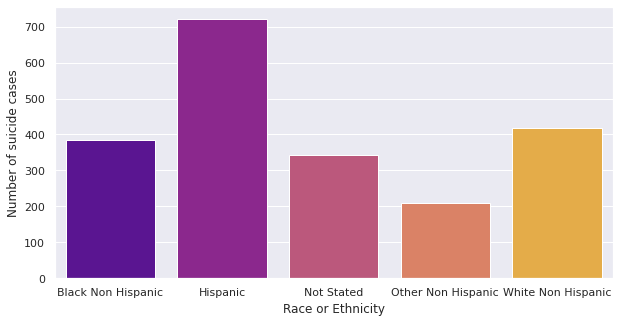

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = count_by_race_or_ethnicity.index,
            y = count_by_race_or_ethnicity.values,
            palette ='plasma')
plt.ylabel("Number of suicide cases")
plt.show()

#Question: Males or Females are commmiting more suicides?

In [ ]:
count_by_sex = df2.groupby(["Sex"])["Sex"].count()

In [ ]:
count_by_sex

Sex
F    1005
M    1071
Name: Sex, dtype: int64

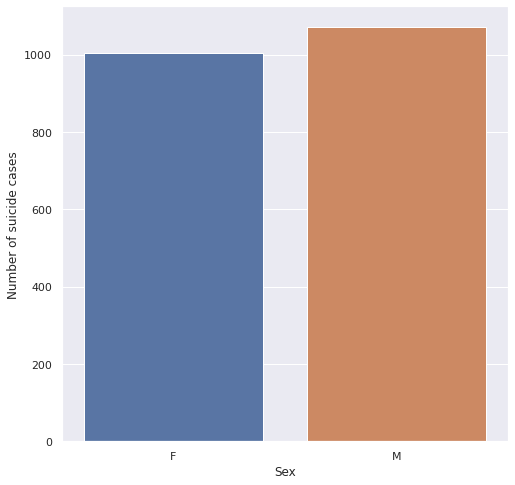

In [ ]:
plt.figure(figsize=(8,8))

sns.countplot(x = "Sex",
              data = df2)

plt.ylabel("Number of suicide cases")

plt.show()

#Question: Which Age group contributes to most cases of suicides?

In [ ]:
count_by_age_group = df2.groupby(["Age Group"])["Age Group"].count()

In [ ]:
count_by_age_group

Age Group
1-9      115
10-19    119
20-24    121
25-34    146
35-44    163
45-54    184
55-64    193
65-74    205
75-84    210
85+      205
<1       153
Total    262
Name: Age Group, dtype: int64

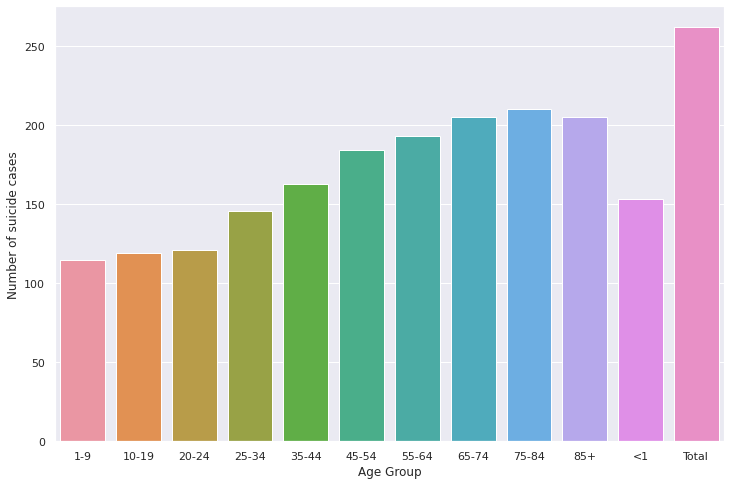

In [ ]:
plt.figure(figsize=(12,8))
sns.color_palette("viridis", as_cmap=True)
sns.barplot(x = count_by_age_group.index,
            y = count_by_age_group.values)
plt.ylabel("Number of suicide cases")
plt.show()

# Question: What is percentage of deaths by suicide of NYC & ROS?

In [ ]:
region_wise_sum = df2.groupby(["Region"])["Firearm Deaths", "Alcohol-Related Deaths", "Suicide Deaths"].sum()

<ipython-input-18-b3340b2f2a6b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_wise_sum = df2.groupby(["Region"])["Firearm Deaths", "Alcohol-Related Deaths", "Suicide Deaths"].sum()


In [ ]:
region_wise_sum

,Firearm Deaths,Alcohol-Related Deaths,Suicide Deaths
Region,,,
NYC,5320,53194,14472
ROS,17118,70842,30282


In [ ]:
region_wise_sum["Suicide Percentage"] = region_wise_sum["Suicide Deaths"]/(region_wise_sum["Firearm Deaths"] + region_wise_sum["Alcohol-Related Deaths"] + region_wise_sum["Suicide Deaths"])

In [ ]:
region_wise_sum

,Firearm Deaths,Alcohol-Related Deaths,Suicide Deaths,Suicide Percentage
Region,,,,
NYC,5320,53194,14472,0.198285
ROS,17118,70842,30282,0.256102


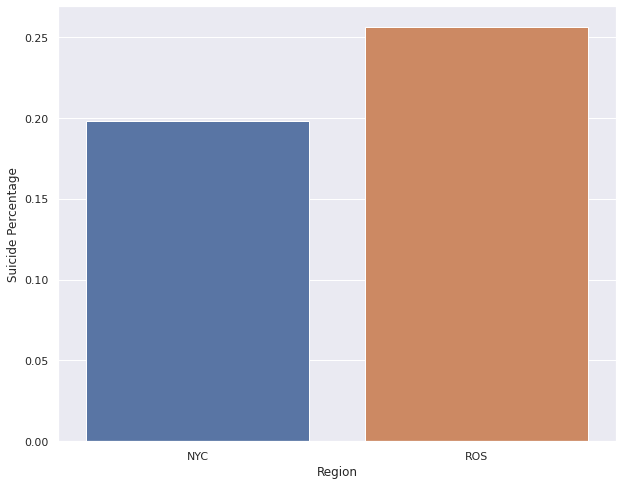

In [ ]:
plt.figure(figsize=(10,8))
sns.color_palette("Paired")
sns.barplot(x = region_wise_sum.index,
            y = region_wise_sum.loc[:, "Suicide Percentage"])
plt.show()

#Question: Has suicide increased or decreased over the years in NYC & ROS? 

In [ ]:
nyc_year_wise_suicides = df2[df2.Region=="NYC"].groupby("Year")["Suicide Deaths"].sum()
nyc_year_wise_suicides

Year
2003     924
2004     928
2005     916
2006     858
2007     932
2008     906
2009     890
2010     908
2011     972
2012    1028
2013    1018
2014    1028
2015    1050
2016    1032
2017    1082
Name: Suicide Deaths, dtype: int64

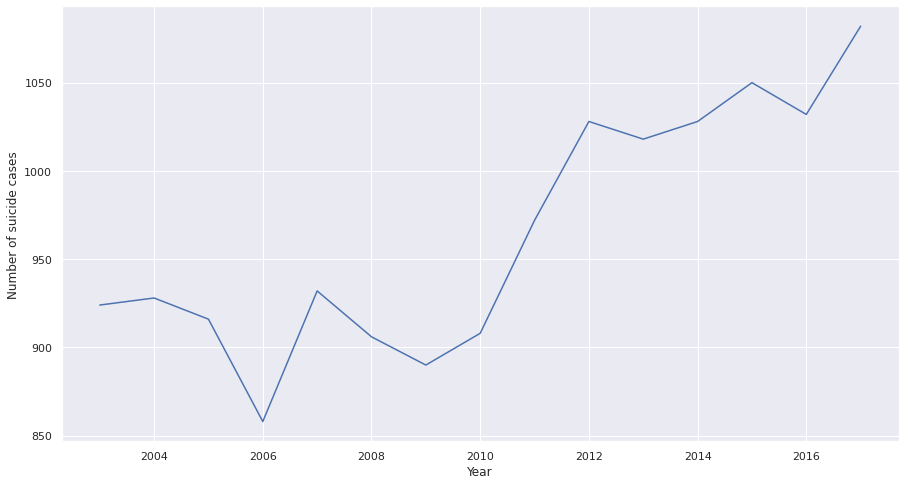

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x = nyc_year_wise_suicides.index, y = nyc_year_wise_suicides.values)
plt.ylabel("Number of suicide cases")
plt.show()

In [ ]:
ros_year_wise_suicides = df2[df2.Region=="ROS"].groupby("Year")["Suicide Deaths"].sum()
ros_year_wise_suicides 

Year
2003    1580
2004    1582
2005    1712
2006    1756
2007    1848
2008    1866
2009    1896
2010    2108
2011    2262
2012    2284
2013    2250
2014    2278
2015    2286
2016    2302
2017    2272
Name: Suicide Deaths, dtype: int64

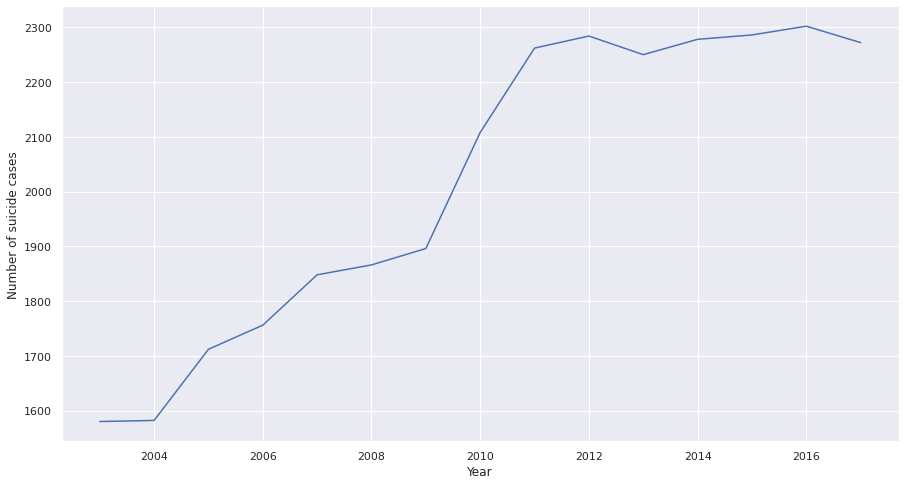

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x = ros_year_wise_suicides.index, y = ros_year_wise_suicides.values)
plt.ylabel("Number of suicide cases")
plt.show()

#Question: How is the number of suicides changing with respect to ethnicity chronologicaly?

In [ ]:
df2["Race or Ethnicity"].unique()

array(['White Non Hispanic', 'Other Non Hispanic', 'Not Stated',
       'Hispanic', 'Black Non Hispanic'], dtype=object)

In [ ]:
year_wise_suicides_by_ethnicity = pd.DataFrame(df2.groupby(["Year", "Race or Ethnicity"])["Suicide Deaths"].sum())

In [ ]:
year_wise_suicides_by_ethnicity

Suicide Deaths
Year Race or Ethnicity                 
2003 Black Non Hispanic               2
     Hispanic                      2492
     Not Stated                       2
     Other Non Hispanic               0
     White Non Hispanic               8
...                                 ...
2017 Black Non Hispanic             304
     Hispanic                       324
     Not Stated                      52
     Other Non Hispanic             190
     White Non Hispanic            2484

[74 rows x 1 columns]

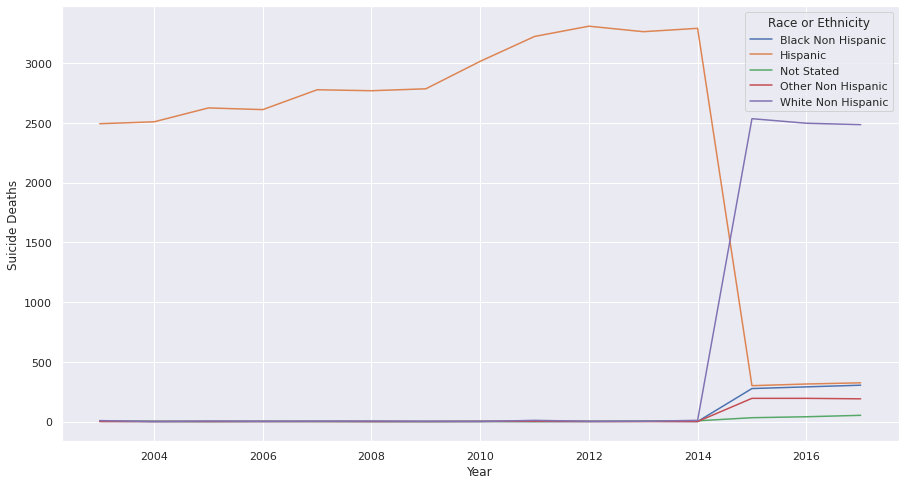

In [ ]:
plt.figure(figsize=(15,8))

lp = sns.lineplot(data=year_wise_suicides_by_ethnicity, 
             x="Year", y="Suicide Deaths", hue="Race or Ethnicity")

plt.show()
lp.figure.savefig("output.png")

#Question: How is the number of suicides changing with respect to age groups chronologicaly?

In [ ]:
year_wise_suicides_by_age_group = pd.DataFrame(df2.groupby(["Year", "Age Group"])["Suicide Deaths"].sum())

In [ ]:
year_wise_suicides_by_age_group

Suicide Deaths
Year Age Group                
2003 1-9                     0
     10-19                  64
     20-24                 102
     25-34                 184
     35-44                 244
...                        ...
2017 65-74                 152
     75-84                  78
     85+                    40
     <1                      0
     Total                1677

[180 rows x 1 columns]

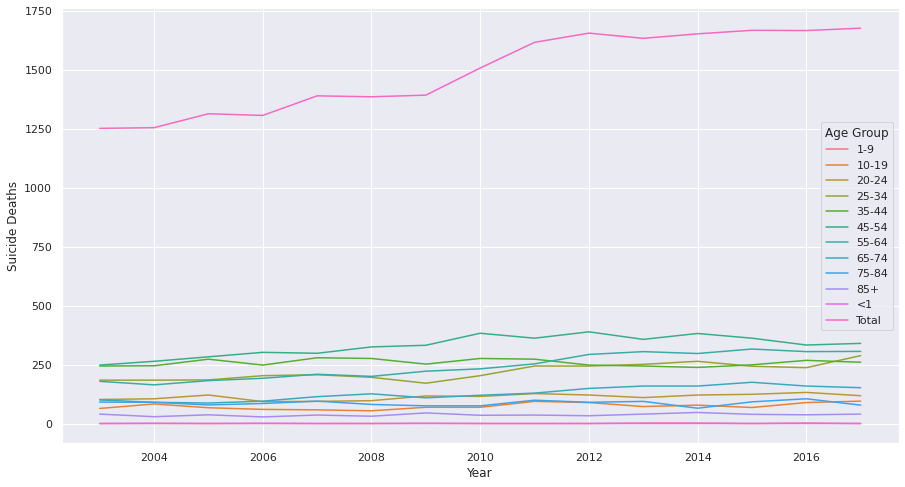

In [ ]:
plt.figure(figsize=(15,8))

sns.color_palette("hls", 8)
lp = sns.lineplot(data=year_wise_suicides_by_age_group, 
             x="Year", y="Suicide Deaths", hue="Age Group")

plt.show()
lp.figure.savefig("output.png")